# Otsu’s thresholding algorithm implementation

## Rolands Laucis (bfn372)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# built-in
import glob
import pathlib
import os

In [10]:
def otsu_thresholding(image):
    """
    Perform Otsu's thresholding on a grayscale image.
    Args:
        image (numpy.ndarray): Grayscale image as a 2D numpy array.
    Returns:
        int: Optimal threshold value.
    """
    # Calculate histogram
    hist, bin_edges = np.histogram(image, bins=256, range=(0, 256))
    
    # Normalize the histogram
    hist_normalized = hist / hist.sum()
    
    # Compute cumulative sums and means
    cumulative_sum = np.cumsum(hist_normalized)
    cumulative_mean = np.cumsum(hist_normalized * np.arange(256))
    total_mean = cumulative_mean[-1]
    
    # Initialize variables
    max_variance = 0
    optimal_threshold = 0
    
    # Iterate through all possible thresholds
    for t in range(256):
        # Probabilities of the two classes
        w0 = cumulative_sum[t]  # Background
        w1 = 1 - w0  # Foreground
        
        if w0 == 0 or w1 == 0:  # Avoid division by zero
            continue
        
        # Class means
        mean0 = cumulative_mean[t] / w0 if w0 > 0 else 0
        mean1 = (total_mean - cumulative_mean[t]) / w1 if w1 > 0 else 0
        
        # Between-class variance
        between_class_variance = w0 * w1 * (mean0 - mean1) ** 2
        
        # Update optimal threshold if variance is higher
        if between_class_variance > max_variance:
            max_variance = between_class_variance
            optimal_threshold = t
    
    return optimal_threshold

In [11]:
def apply_threshold(image, threshold):
    """
    Apply a threshold to create a binary image.
    Args:
        image (numpy.ndarray): Grayscale image as a 2D numpy array.
        threshold (int): Threshold value.
    Returns:
        numpy.ndarray: Binary segmented image.
    """
    binary_image = (image > threshold).astype(np.uint8) * 255
    return binary_image

In [12]:
# Get image paths using glob
image_paths = glob.glob(os.path.join('images', '*'))
img_count = len(image_paths)

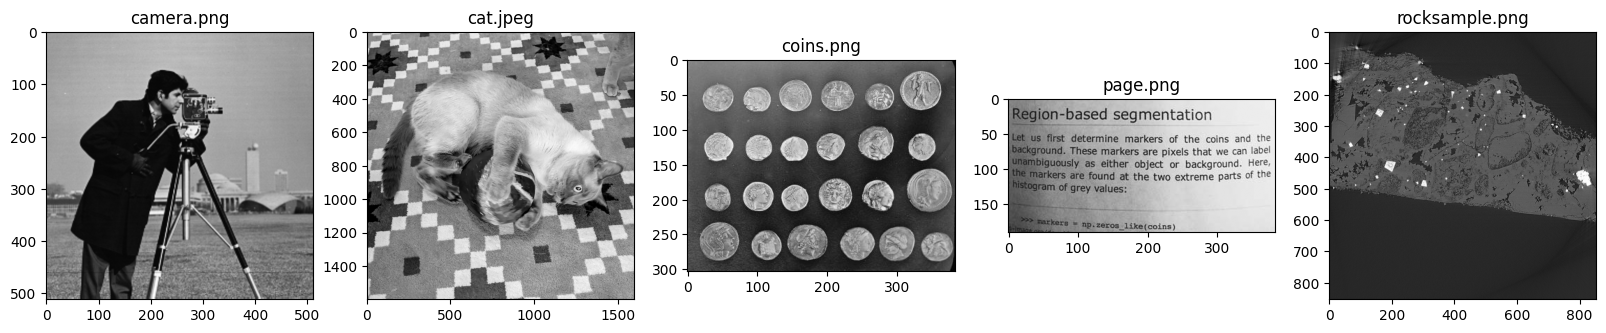

In [18]:
fig, axis = plt.subplots(1, img_count)
fig.set_figwidth(20)

for i, image_path in enumerate(image_paths):
    name = pathlib.Path(image_path).name
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # display the results:
    axis[i].title.set_text(name)
    axis[i].imshow(image, cmap='gray')

Optimal threshold for images\camera.png: 87
Optimal threshold for images\cat.jpeg: 123
Optimal threshold for images\coins.png: 107
Optimal threshold for images\page.png: 157
Optimal threshold for images\rocksample.png: 67


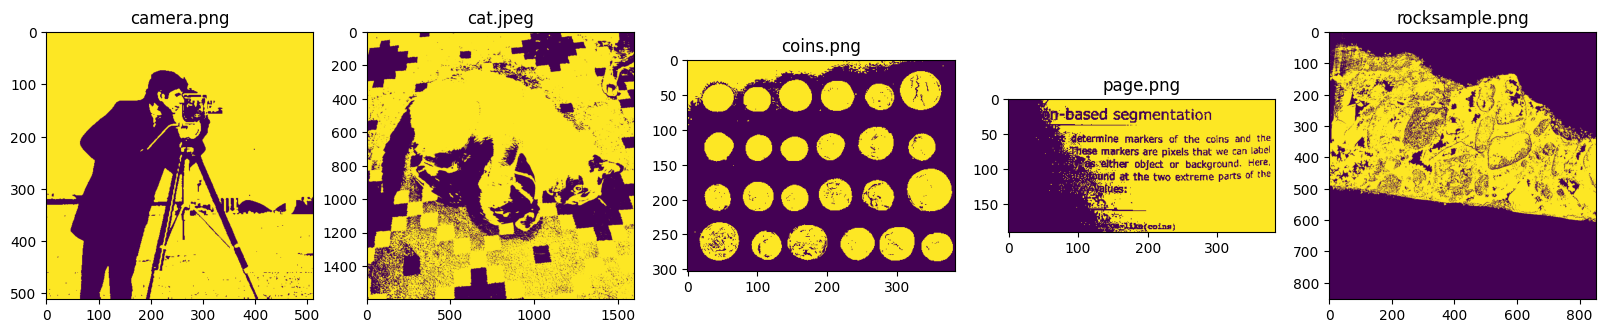

In [16]:
fig, axis = plt.subplots(1, img_count)
fig.set_figwidth(20)

for i, image_path in enumerate(image_paths):
    name = pathlib.Path(image_path).name

    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue
    
    # Perform Otsu's thresholding
    threshold = otsu_thresholding(image)
    print(f"Optimal threshold for {image_path}: {threshold}")
    
    # Apply the threshold
    binary_image = apply_threshold(image, threshold)
    
    # display the results:
    axis[i].title.set_text(name)
    axis[i].imshow(binary_image)